In [1]:
import numpy as np
import itertools
np.set_printoptions(precision=7, suppress=True)

import cirq
from cirq import ops, Circuit
from cirq.ops import CZ, H, CNOT, X, Y, Z, SWAP
from cirq.google import ExpWGate

from cirq.contrib.rearrange import separate
from cirq.contrib.rearrange.separate import convert_circuit, non_clifford_half, clifford_half

from cirq.contrib.rearrange.axis import *
from cirq.contrib.rearrange.clifford_pauli_gate import CliffordPauliGate
from cirq.contrib.rearrange.interaction_gate import InteractionGate
from cirq.contrib.rearrange.pauli_string import PauliString
from cirq.contrib.rearrange.non_clifford_gate import NonCliffordGate
from cirq.contrib.rearrange import optimize_pauli_strings as opt_strings
from cirq.contrib.rearrange.optimize_pauli_strings import (
    circuit_to_strings, strings_to_circuit, optimize_pauli_strings, get_ordered_qubits, display_strings, near_zero)

from cirq.testing import assert_allclose_up_to_global_phase

from cirq.contrib.rearrange.separate_test import toffoli_circuit, qft_circuit

In [2]:
import pickle

def saveCircuit(fName):
    with open(fName, 'wb') as f:
        pickle.dump(circuit, f)
def loadCircuit(fName):
    with open(fName, 'rb') as f:
        return pickle.load(f)

In [127]:
cirq.google.Simulator = cirq.google.XmonSimulator
def make_circuit():
    return toffoli_circuit()
    #return loadCircuit('fermionSwap8.pkl')
    #return loadCircuit('fermionSplit8.pkl')
make_circuit()

q0: ─────────────────────────────────────────@──────────────────────────────────────────────────@────────────────────────@───Z^0.25────@───────────
                                             │                                                  │                        │             │
q1: ───────────────@─────────────@───X───@───X───@───X───@────────────@─────────────@───X───@───X───@───X───@───Z^0.25───X───Z^-0.25───X───────────
                   │             │   │   │       │   │   │            │             │   │   │       │   │   │
q2: ───Y^0.5───X───X───Z^-0.25───X───@───X───────X───@───X───Z^0.25───X───Z^-0.25───X───@───X───────X───@───X───Z^0.25─────────────────Y^0.5───X───

In [128]:
large_circ = make_circuit()
#cirq.google.ConvertToXmonGates().optimize_circuit(large_circ)
cirq.google.MergeInteractions(allow_partial_czs=False).optimize_circuit(large_circ)
cirq.google.MergeRotations().optimize_circuit(large_circ)
display(large_circ)
cirq.google.MergeInteractions(allow_partial_czs=False).optimize_circuit(large_circ)
cirq.google.MergeRotations().optimize_circuit(large_circ)
cirq.circuits.DropNegligible().optimize_circuit(large_circ)
cirq.circuits.DropEmptyMoments().optimize_circuit(large_circ)
large_circ

q0: ───────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────────────Y^-0.5───@───X^-0.25───@───Y^0.5───Z^0.25───
                                                                   │                                                          │                                                                               │             │
q1: ───────────────Y^-0.5───Z───@───Y^0.5───@───Z^-0.25────────────X───W(0.25)^0.5───Z^0.531───@───W(0.781)^-0.5───Z^-0.531───X───W(0.25)───@───Y^0.5───@───Y^-0.5───Z^-0.5───@───X^0.5────Z^-0.25────────────Z─────────────Z───Y────────────────
                                │           │                                                  │                                            │           │                     │
q2: ───Y^0.5───Z────────────────Z───Y^0.5───Z───Y^0.5─────Z^0.79───────────────────────────────Z───W(0.145)─────────────────────────────────Z───Y^0.5───Z───Y^-0.5───Z^-0.5───Z───Y^0.25───Z^0.5─────────────────────────────────────────────────

q0: ─────────────────────────────────────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────────W(0.684)^-0.5───Z^0.816───@───X^-0.25───@───Y^-0.5────Z^-0.566───
                                                                                                 │                                                            │                                                                                                                            │             │
q1: ─────────────────────────────W(0.191)^-0.5───Z^-0.691───@───Y^0.5───@───X^0.894───Z^0.75─────X───W(0.25)^0.5───Z^0.531───@───W(0.781)^-0.5─────Z^-0.531───X───W(0.428)^0.456───Z^-0.861───@───Y^0.5───@───Y^-0.5───Z^-0.5───@───W(0.489)^-0.565───Z^0.91───────────────────────────────Z─────────────Z───Z^0.816──────────────
                                                            │           │                                                    │                                                                │           │                     │
q2: ───W(0.606)^-0.5───Z^0.894──────────────────────────────Z───Y^0.5───Z───Y^0.5─────Z^-0.518───────────────────────────────Z───W(0.253)^-0.511───Z^0.812────────────────────────────────────Z───Y^0.5───Z───Y^-0.5───Z^-0.5───Z───W(0.83)^0.428─────Z^-0.295────────────────────────────────────────────────────────────────────

In [129]:
circuit = convert_circuit(large_circ, pre_optimize=False)

In [130]:
c_left0 = non_clifford_half(circuit)
c_right0 = clifford_half(circuit)
pauli_strings, c_left_right = optimize_pauli_strings(circuit_to_strings(c_left0), max_steps=100)
#opt_strings.remove_duplicate_strings(pauli_strings)
#opt_strings.remove_negligible_strings(pauli_strings)
c_left = strings_to_circuit(pauli_strings)
display(c_left)
c_right = c_left_right + c_right0
c_right

Remove duplicate
Reduced length from 37 to 25
Remove negligible
Reduced length from 25 to 24
Move clifford out
Reduced length from 24 to 21
Remove duplicate
Reduced length from 21 to 18
Remove negligible
Reduced length from 18 to 18
Move clifford out
Reduced length from 18 to 18
Remove duplicate
Reduced length from 18 to 18
Remove negligible
Reduced length from 18 to 18
Move clifford out
Reduced length from 18 to 18
Final length 18


q0: ───────────────────────────[Z]^-0.25───[Z]^-0.511───[Z]^0.25──────────────[Z]^-1.25─────────────────────────────[Z]^-0.489───────────────[Z]^-0.565───────────────[Z]^2.22───────────────────────────
                               │           │            │                                                           │                        │                        │
q1: ───[Z]^-0.963───[Z]^0.75───[Z]─────────[X]──────────┼──────────[Z]^1.06────────────────[Z]^0.456────────────────[X]──────────[Z]^-0.83───[Y]──────────[Z]^0.428───[X]────────[Z]^0.535───[X]^-0.25───
                    │          │           │            │                                  │                        │            │           │            │           │          │           │
q2: ───[Z]^0.288────[Y]────────[Y]─────────[Y]──────────[Y]───────────────────[Y]^-0.428───[Z]─────────[Y]^-0.433───[Y]──────────[Z]─────────[Y]──────────[X]─────────[Y]────────[Z]─────────[Y]─────────

q0: ─────────────────────────────X^0.5────────────X───nZ^0.5───X───nX^0.5──────────────────────────────────────────────────────────────Z────────────────────────────Z───nX^0.5───────────────────────────────────────────────────────────────────────────Z───Z───nZ^0.5───nX^0.5───Z^0.5───
                                                  │            │                                                                       │                            │                                                                                    │   │
q1: ───X^0.5───nZ^0.5───nX^0.5───────────nY^0.5───Z────────────Z───Y^0.5────nX^0.5───Z───nZ^0.5───X^0.5───Z^0.5───Z────────────────────X───────X^0.5───Z───nX^0.5───X────────────Z───nZ^0.5───X^0.5───Z^0.5───Z───nZ^0.5───nX^0.5───Z^0.5───nZ^0.5───Z───Z───Z─────────────────────────────
                                                                                     │                            │                                    │                         │                            │                                      │
q2: ───X^0.5───nZ^0.5───nX^0.5──────────────────────────────────────────────nX^0.5───Z───nZ^0.5───X^0.5───Z^0.5───Z───nZ^0.5───X^0.5───Z^0.5───────────Z─────────────────────────Z───nZ^0.5───X^0.5───Z^0.5───Z───nZ^0.5───nX^0.5───Z^0.5───nZ^0.5───Z─────────────────────────────────────

In [131]:
class StringCircuit:
    def __init__(self, pauli_strings, qubit_order):
        self.strings = pauli_strings
        self.qubit_order = qubit_order

    @staticmethod
    def from_non_clifford_circuit(circuit):
        strings = [op.gate.pauli_string for op in circuit.iter_ops()]
        qubit_order = ops.QubitOrder.as_qubit_order(ops.QubitOrder.DEFAULT).order_for(circuit.qubits())
        return StringCircuit(strings, qubit_order)
    
    def to_non_clifford_circuit(self):
        return Circuit.from_ops(
                    (NonCliffordGate(string).updated_op() for string in self.strings),
                    strategy=cirq.InsertStrategy.EARLIEST)
    
    def commutes_across(self, string, start_i, end_i):
        return all((string.commutes_with()))
        
    
    
    def __repr__(self):
        ret = 'Total length: {}\n'.format(len(self.strings))
        for string in self.strings:
            for qubit in self.qubit_order:
                axis = string.get_axis(qubit, None)
                ret += '{!s:>2}'.format(axis if axis is not None else '.', end='')
            ret += '  {:.8f}\n'.format(string.half_turns)
        return ret

In [132]:
sc = StringCircuit.from_non_clifford_circuit(c_left)
sc

Total length: 18
 . . Z  0.28806682
 . Z .  -0.96283057
 . Z Y  0.75000000
 Z Z Y  -0.25000000
 Z X Y  -0.51074863
 Z . Y  0.25000000
 . Z .  1.06466756
 . . Y  -0.42847324
 Z . .  -1.25000000
 . Z Z  0.45640196
 . . Y  -0.43293286
 Z X Y  -0.48902585
 . Z Z  -0.83009298
 Z Y Y  -0.56463018
 . Z X  0.42799301
 Z X Y  2.21504434
 . Z Z  0.53473040
 . X Y  -0.25000000

In [133]:
class PartialOrderingNode:
    def __init__(self, string):
        self.string = string
        self._left = set()
        self._right = set()
        
    def add_left(self, other):
        if other in self._left:
            return
        self._left.add(other)
        other.add_right(self)
        
    def add_right(self, other):
        if other in self._right:
            return
        self._right.add(other)
        other.add_left(self)
        
    @property
    def left(self):
        return self._left
        
    @property
    def right(self):
        return self._right

In [134]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
import io

class PartialOrdering:
    def __init__(self, digraph, labels=None):
        self.digraph = digraph
        self.labels = labels
        
    def to_strings(self):
        return list(self._iter_strings())
    
    def _iter_strings(self):
        nodes = set(self.digraph.nodes)
        nodes2 = set()
        popped_nodes = set()
        num_popped = -1
        while num_popped != 0:
            num_popped = 0
            nodes2.clear()
            for node in nodes:
                if node.left.issubset(popped_nodes):
                    if node.string is not None:
                        yield node.string
                    popped_nodes.add(node)
                    num_popped += 1
                else:
                    nodes2.add(node)
            nodes, nodes2 = nodes2, nodes
        if len(nodes) > 0:
            raise RuntimeError('Cyclic graph')

    @staticmethod
    def from_strings(strings, include_boundary_nodes=True):
        g, _, _, labels = PartialOrdering._graph_from_strings_thorough(strings,
                                            include_boundary_nodes=include_boundary_nodes)
        return PartialOrdering(g, labels=labels)

    @staticmethod
    def _graph_from_strings(strings, include_boundary_nodes=True):
        def partial_ordering_pass(used_nodes, front_nodes, nodes):
            new_front_nodes = set(front_nodes)
            remove_front_nodes = set()
            num_used = 0
            for i, node in enumerate(nodes):
                anticommute_set = set()
                need_later_pass = False
                if node in used_nodes:
                    continue
                front_count = 0
                for j in range(len(nodes)-1, -1, -1):
                    node_left = nodes[j]
                    if j > i:
                        front_count += node_left in front_nodes
                        continue
                    if j == i:
                        continue
                    commutes = node.string.commutes_with(node_left.string)
                    is_front_node = node_left in front_nodes
                    if not commutes:
                        if is_front_node:
                            anticommute_set.add(node_left)
                        elif node_left in used_nodes:
                            if front_count < len(front_nodes):
                                print()
                                print(sorted({nodes.index(n) for n in {node}}))
                                print(sorted({nodes.index(n) for n in used_nodes}))
                                print(sorted({nodes.index(n) for n in front_nodes}))
                                #######
                                node.add_left(node_left)
                            break
                        else:
                            need_later_pass = True
                            break
                    if is_front_node:
                        front_count += 1
                        if front_count >= len(front_nodes):
                            break
                if not need_later_pass:
                    num_used += 1
                    new_front_nodes.add(node)
                    if len(anticommute_set) > 0:
                        for node_left in anticommute_set:
                            node.add_left(node_left)
                            remove_front_nodes.add(node_left)
            return used_nodes | new_front_nodes, new_front_nodes - remove_front_nodes, num_used

        nodes = [PartialOrderingNode(string) for string in strings]
        front_nodes = set()
        used_nodes = set()
        num_used = 1
        while num_used > 0:
            used_nodes, front_nodes, num_used = partial_ordering_pass(used_nodes, front_nodes, nodes)

        g = nx.DiGraph()
        g.add_nodes_from(nodes)
        g.add_edges_from((
            (node_left, node) for node in nodes for node_left in node.left
        ))
        labels = {node: '{}'.format(i) for i, node in enumerate(nodes)}
        if include_boundary_nodes:
            leftmost = PartialOrderingNode(None)
            rightmost = PartialOrderingNode(None)
            for node in nodes:
                if len(node.right) <= 0:
                    node.add_right(rightmost)
                if len(node.left) <= 0:
                    node.add_left(leftmost)
            g.add_nodes_from((leftmost, rightmost))
            g.add_edges_from((
                (node, rightmost) for node in rightmost.left
            ))
            g.add_edges_from((
                (leftmost, node) for node in leftmost.right
            ))
            labels.update({leftmost: 'L', rightmost: 'R'})
            return g, leftmost, rightmost, labels
        else:
            return g, None, None, labels

    @staticmethod
    def _graph_from_strings_thorough(strings, include_boundary_nodes=True):
        nodes = [PartialOrderingNode(string) for string in strings]
        for i, node in enumerate(nodes):
            for j in range(i+1, len(nodes)):
                node_right = nodes[j]
                if not node.string.commutes_with(node_right.string):
                    node.add_right(node_right)

        g = nx.DiGraph()
        g.add_nodes_from(nodes)
        g.add_edges_from((
            (node_left, node) for node in nodes for node_left in node.left
        ))
        labels = {node: '{}'.format(i) for i, node in enumerate(nodes)}
        if include_boundary_nodes:
            leftmost = PartialOrderingNode(None)
            rightmost = PartialOrderingNode(None)
            for node in nodes:
                node.add_right(rightmost)
                node.add_left(leftmost)
            g.add_nodes_from((leftmost, rightmost))
            g.add_edges_from((
                (node, rightmost) for node in rightmost.left
            ))
            g.add_edges_from((
                (leftmost, node) for node in leftmost.right
            ))
            labels.update({leftmost: 'L', rightmost: 'R'})
            return g, leftmost, rightmost, labels
        else:
            return g, None, None, labels
        
    def node_display_layout(self):
        g = self.digraph
        labels = self.labels
        layout_array = []
        layout = {}
        left_nodes = {node for node, degree in g.in_degree() if degree == 0}
        next_nodes = left_nodes
        x, y = 0, 0
        last_y = 0
        def get_next_nodes(node):
            next_nodes = {next_node for curr_node, next_node in g.edges if curr_node == node}
            return sorted(next_nodes, key=labels.get)
        def push_right(node, distance):
            if node not in layout:
                raise RuntimeError('Cyclic graph')
            xx, yy = layout[node]
            layout[node] = xx+distance, yy
            for next_node in get_next_nodes(node):
                push_right(next_node, distance)
        def place(node):
            nonlocal x, y, last_y
            if node in layout:
                if layout[node][0] >= x:
                    x = layout[node][0] + 1
                else:
                    # Push everything after node to the right
                    push_right(node, x - layout[node][0])
                    x += 1
            else:
                if y < last_y:
                    y = last_y - 1
                layout[node] = x, y
                last_y = y
                x += 1
        def place_after(node):
            nonlocal x, y
            place(node)
            save_x = x
            for next_node in get_next_nodes(node):
                place_after(next_node)
                if x != save_x:
                    y -= 1
                    x = save_x
        for left_node in left_nodes:
            place_after(left_node)
            if x != 0:
                y -= 1
                x = 0

        layout2 = {node: (-1, -1) for node in g.nodes}
        #layout2.update({node: {-2, -2} for node in self.labels})
        layout2.update(layout)
        return layout2
    
    def draw(self, neat=False, ax=None):
        if neat:
            pos = self.node_display_layout()
            print(sorted(pos.values()))
        else:
            pos = graphviz_layout(self.digraph)
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(1, 1, 1)
        nx.draw(self.digraph, pos=pos, labels=self.labels, ax=ax)
        
    def _repr_svg_(self):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        self.draw(neat=False, ax=ax)
        with io.StringIO() as f:
            fig.savefig(f, format='svg')
            plt.close(fig)
            f.seek(0)
            return f.read()

In [163]:
po = PartialOrdering.from_strings(sc.strings)
#po

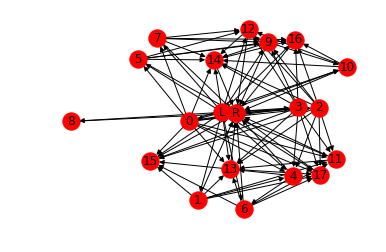

In [165]:
po.draw(neat=False)

In [138]:
sc2 = StringCircuit(po.to_strings(), sc.qubit_order)
sc2

Total length: 18
 Z . .  -1.25000000
 . . Z  0.28806682
 . Z .  -0.96283057
 Z . Y  0.25000000
 Z Z Y  -0.25000000
 . Z Y  0.75000000
 Z X Y  -0.51074863
 . Z .  1.06466756
 . . Y  -0.42847324
 Z X Y  -0.48902585
 . Z Z  0.45640196
 Z Y Y  -0.56463018
 Z X Y  2.21504434
 . . Y  -0.43293286
 . X Y  -0.25000000
 . Z Z  -0.83009298
 . Z X  0.42799301
 . Z Z  0.53473040

In [139]:
sc

Total length: 18
 . . Z  0.28806682
 . Z .  -0.96283057
 . Z Y  0.75000000
 Z Z Y  -0.25000000
 Z X Y  -0.51074863
 Z . Y  0.25000000
 . Z .  1.06466756
 . . Y  -0.42847324
 Z . .  -1.25000000
 . Z Z  0.45640196
 . . Y  -0.43293286
 Z X Y  -0.48902585
 . Z Z  -0.83009298
 Z Y Y  -0.56463018
 . Z X  0.42799301
 Z X Y  2.21504434
 . Z Z  0.53473040
 . X Y  -0.25000000

In [140]:
for node in po.digraph.nodes:
    if node.string and near_zero(node.string.half_turns - -0.07599089, tolerance=1e-5):
        print(node.string.half_turns)
        print(tuple(node.left)[0].string)
        print(tuple(node.right)[0].string)
        break

In [141]:
node.string.qubit_axis_map

{NamedQubit('q0'): Axis(2),
 NamedQubit('q1'): Axis(2),
 NamedQubit('q2'): Axis(1)}

In [142]:
StringCircuit([node.string], sc.qubit_order)

Total length: 1
 Z Z Y  -0.25000000

In [143]:
for string in sc.strings:
    print(string.commutes_with(node.string))

False
True
True
True
False
True
True
True
True
False
True
False
False
False
False
False
False
False


In [144]:
sc.to_non_clifford_circuit()

q0: ───────────────────────────[Z]^-0.25───[Z]^-0.511───[Z]^0.25──────────────[Z]^-1.25─────────────────────────────[Z]^-0.489───────────────[Z]^-0.565───────────────[Z]^2.22───────────────────────────
                               │           │            │                                                           │                        │                        │
q1: ───[Z]^-0.963───[Z]^0.75───[Z]─────────[X]──────────┼──────────[Z]^1.06────────────────[Z]^0.456────────────────[X]──────────[Z]^-0.83───[Y]──────────[Z]^0.428───[X]────────[Z]^0.535───[X]^-0.25───
                    │          │           │            │                                  │                        │            │           │            │           │          │           │
q2: ───[Z]^0.288────[Y]────────[Y]─────────[Y]──────────[Y]───────────────────[Y]^-0.428───[Z]─────────[Y]^-0.433───[Y]──────────[Z]─────────[Y]──────────[X]─────────[Y]────────[Z]─────────[Y]─────────

In [145]:
def assert_equal_circuits(c1, c2):
    assert_allclose_up_to_global_phase(
        c1.to_unitary_matrix(),
        c2.to_unitary_matrix())

In [146]:
assert_equal_circuits(
sc.to_non_clifford_circuit(),
sc2.to_non_clifford_circuit(),
)

In [147]:
assert_equal_circuits(
c_left,
sc2.to_non_clifford_circuit(),
)